# Gaussian mixture model

In [1]:
# We need imagemagick to write a gif animation at the end
!apt-get install imagemagick

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

We start with some data

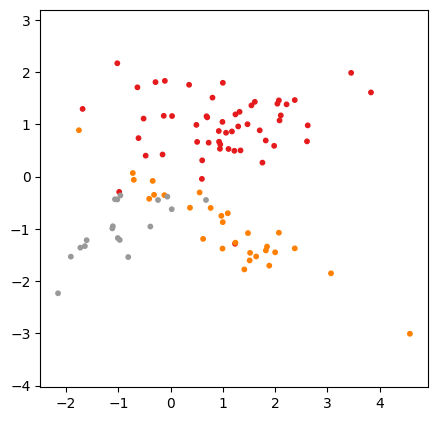

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           weights=[.5, .3], random_state=3)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
x_min, x_max, y_min, y_max = plt.axis('equal')
plt.show()

Since we want to see how a set of test imports would be atrributed to class, we can create a grid of those imports now.

In [0]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                      np.arange(y_min, y_max, .1))
coords = np.c_[xx.ravel(), yy.ravel()]

Now for estimating the parameters of the class distributions

In [0]:
mu = [np.mean(X[y==l, :], axis=0) for l in range(len(set(y)))]
C = [np.cov(X[y==l, :].T) for l in range(len(set(y)))]

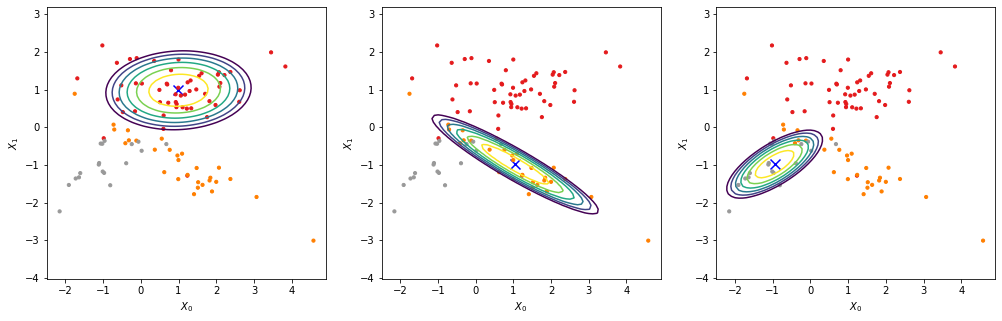

In [8]:
fig = plt.figure(figsize=(17, 5))
for i in range(len(set(y))):
  P = lambda x: np.matmul(np.matmul(np.vstack(mu[i]-x).T, np.linalg.inv(C[i])), np.vstack(mu[i]-x))
  Z = np.apply_along_axis(P, 1, coords)
  Z = Z.reshape(xx.shape)
  ax = fig.add_subplot(1, 3, i+1)
  ax.contour(xx, yy, -Z, cmap='viridis', levels=[-3, -2.5, -2, -1.5, -1, -.5])
  ax.scatter(mu[i][0], mu[i][1], s=100, marker='x', linewidths=3, c='b')
  ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
  ax.axis('equal')
  ax.set_xlabel("$X_0$")
  ax.set_ylabel("$X_1$")
fig.show()

Now, lets assume we don't have the labels for this data. How can we estimate the densities then?

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(X)
mu = list(gmm.means_)
C = list(gmm.covariances_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


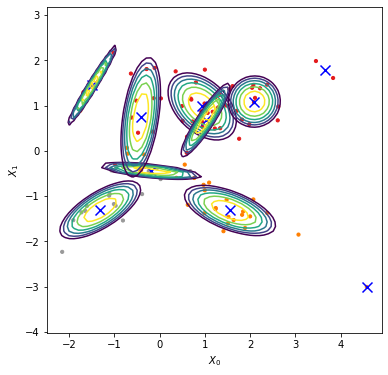

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
for i in range(len(mu)):
  P = lambda x: np.matmul(np.matmul(np.vstack(mu[i]-x).T, np.linalg.inv(C[i])), np.vstack(mu[i]-x))
  Z = np.apply_along_axis(P, 1, coords)
  Z = Z.reshape(xx.shape)
  ax.contour(xx, yy, -Z, cmap='viridis', levels=[-3, -2.5, -2, -1.5, -1, -.5])
  ax.scatter(mu[i][0], mu[i][1], s=100, marker='x', linewidths=3, c='b')
ax.axis('equal')
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
fig.show()

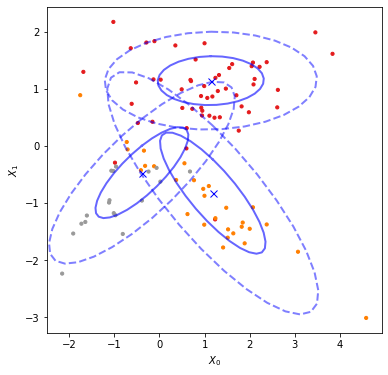

In [16]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

n_components = 3
n_samples = X.shape[0]
n_dim = X.shape[1]

mu = [np.random.uniform(-2, 2, size=n_dim) for i in range(n_components)]
C = [np.eye(n_dim) for i in range(n_components)]
pi = np.ones(n_components) / n_components

t = np.linspace(0, 2*np.pi, 30)
def level(mu, C, radius):
  V = np.linalg.cholesky(C)
  A = np.concatenate([np.vstack(np.sin(t)*radius), np.vstack(np.cos(t)*radius)], axis=1)
  Y = np.matmul(V, A.T).T
  Y[:, 0] += mu[0]
  Y[:, 1] += mu[1]
  return Y

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
l, = ax.plot([mu[i][0] for i in range(n_components)], [mu[i][1] for i in range(n_components)], 'bx', linewidth=3, markersize=7)
circles = list()
for i in range(n_components):
  Y = level(mu[i], C[i], 1)
  c, = ax.plot(Y[:, 0], Y[:, 1], 'b-', linewidth=2, alpha=.6)
  circles.append(c)
  Y = level(mu[i], C[i], 2)
  c, = ax.plot(Y[:, 0], Y[:, 1], 'b--', linewidth=2, alpha=.5)
  circles.append(c)
ax.axis([x_min, x_max, y_min, y_max])
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")

def update(i):
  # E step
  gamma = np.zeros((n_samples, n_components))
  for i in range(n_components):
    gamma[:, i] = pi[i]*multivariate_normal.pdf(X, mean=mu[i], cov=C[i])
  for i in range(n_samples):
    gamma[i, :] /= np.sum(gamma[i, :])
  # M step
  alpha = .1
  for i in range(n_components):
    pi[i] = alpha*np.sum(gamma[:, i])/np.sum(gamma.ravel()) + (1-alpha)*pi[i]
    w = gamma[:, i]/np.sum(gamma[:, i])
    mu[i] = alpha*np.average(X, axis=0, weights=w) + (1-alpha)*mu[i]
    C[i] = alpha*np.cov(X.T, aweights=w) + (1-alpha)*C[i]
  # Update graphics
  l.set_data([mu[i][0] for i in range(n_components)], [mu[i][1] for i in range(n_components)])
  j = 0
  for i in range(n_components):
    Y = level(mu[i], C[i], 1)
    circles[j].set_data(Y[:, 0], Y[:, 1])
    j += 1
    Y = level(mu[i], C[i], 2)
    circles[j].set_data(Y[:, 0], Y[:, 1])
    j += 1

anim = FuncAnimation(fig, update, frames=100);
HTML(anim.to_jshtml(fps=20))
# anim.save('gmm.gif', writer='imagemagick', fps=20)
# ani.to_html5_video()